# FederatedPi
This is a project where we aim to apply a federated learning technique to a Multi-Layer Perceptron (MLP) model.

# Data Generation
    

In [102]:
#This file will generate data for training
#Temperature values range from 20C to 43C (highest recorded fever) in humans, 36.5 to 37.5 being the o.k. range
#Resting heart rate values range in humans range from 60 (low for an old person) and 190 (high for a newborn)

    #newborn : 140 ± 50
    #1–2 ans : 110 ± 40
    #3–5 ans : 105 ± 35
    #6–12 ans : 95 ± 30
    #adolescent ou adulte : 70 ± 10
    #personne âgée : 65 ± 5

#We will generate values based on the age of subjects and a gaussian normal distribution
#from faker import Faker
#from faker.providers import BaseProvider
import random
import csv
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

def get_age():
    #return  random.randrange(0, 100)
    return random.uniform(0,100)
def get_Temp():
    mu= 37
    sigma= 0.5

    return round(random.gauss(mu,sigma), 1)

def get_HR(age):

    if age<1:
        mu= 140
        sigma= 50
    elif age<3:
        mu= 110
        sigma= 40
    elif age<5:
        mu= 105
        sigma= 35
    elif age<12:
        mu= 95
        sigma= 30
    elif age<65:
        mu= 70
        sigma= 10
    else:
        mu= 65
        sigma= 5

    return round(random.gauss(mu,sigma), 1)

# def get_Label(age, temp, hr):
#     label=0
#     if ( 0<=age<1 and 90<=hr<=190 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 1<=age<3 and 70<=hr<=150 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 3<=age<6 and 70<=hr<=140 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 0<=age<12 and 65<=hr<=125 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 12<=age<65 and 60<=hr<=90 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( age>=65 and 60<=hr<=70 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     return label
def get_Label(age, temp, hr): # increases with age & hr & temp
#   label = round((hr/190)*(age/100)*90)
    if (age/100)>0.5 and (hr/190)<0.5 and temp>36.5 and temp<37.5:
        label=1
        return label
    label=0
    return label


def generate_DATA():
    a=get_age();
    b=get_Temp();
    c=get_HR(a);
    d=get_Label(a,b,c);
    return [a,b,c,d]
    #return [a,b,c,d]
    
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

with open('Data_Train.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Temperature', 'HeartBPM', 'Label'])
    for n in range(0, 200):
        writer.writerow(generate_DATA())

with open('Data_Test.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Temperature', 'HeartBPM', 'Label'])
    for n in range(0, 100):
        writer.writerow(generate_DATA())
        
#Data_Train = min_max_scaling(pd.read_csv('Data_Train.csv',dtype=np.float64))
#Data_Test = min_max_scaling(pd.read_csv('Data_Test.csv',dtype=np.float64))
Data_Train = pd.read_csv('Data_Train.csv')
Data_Test = pd.read_csv('Data_Test.csv')
Data_Total = Data_Train.merge(Data_Test)

print(Data_Train) #original Data
print(Data_Test) #original Data

Data_Train1 = Data_Train.iloc[:99,:]
Data_Test1 = Data_Test.iloc[:49,:]

print(Data_Train1.shape)
print(Data_Test1.shape)


Data_Train2 = Data_Train.iloc[100:,:]
Data_Test2 = Data_Test.iloc[50:,:]

print(Data_Train2.shape)
print(Data_Test2.shape)


           Age  Temperature  HeartBPM  Label
0    93.904084         36.4      71.7      0
1    56.748386         37.5      69.5      0
2    11.386958         37.1     100.2      0
3    85.368439         36.6      68.6      1
4    56.927382         36.7      59.2      1
..         ...          ...       ...    ...
195  32.876244         37.0      84.7      0
196  82.953197         36.9      62.2      1
197  92.515981         37.1      59.0      1
198  27.368299         36.9      56.6      0
199  74.829482         37.2      64.4      1

[200 rows x 4 columns]
          Age  Temperature  HeartBPM  Label
0   16.344251         37.2      89.0      0
1   59.065050         37.2      72.6      1
2    3.184031         37.0     124.2      0
3   27.327332         37.5      51.7      0
4   19.655135         36.8      81.1      0
..        ...          ...       ...    ...
95  79.153128         36.9      60.6      1
96  58.103820         36.7      68.0      1
97  93.317149         37.8      64.7    

##Data Visualisation

In [103]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Temperature'>

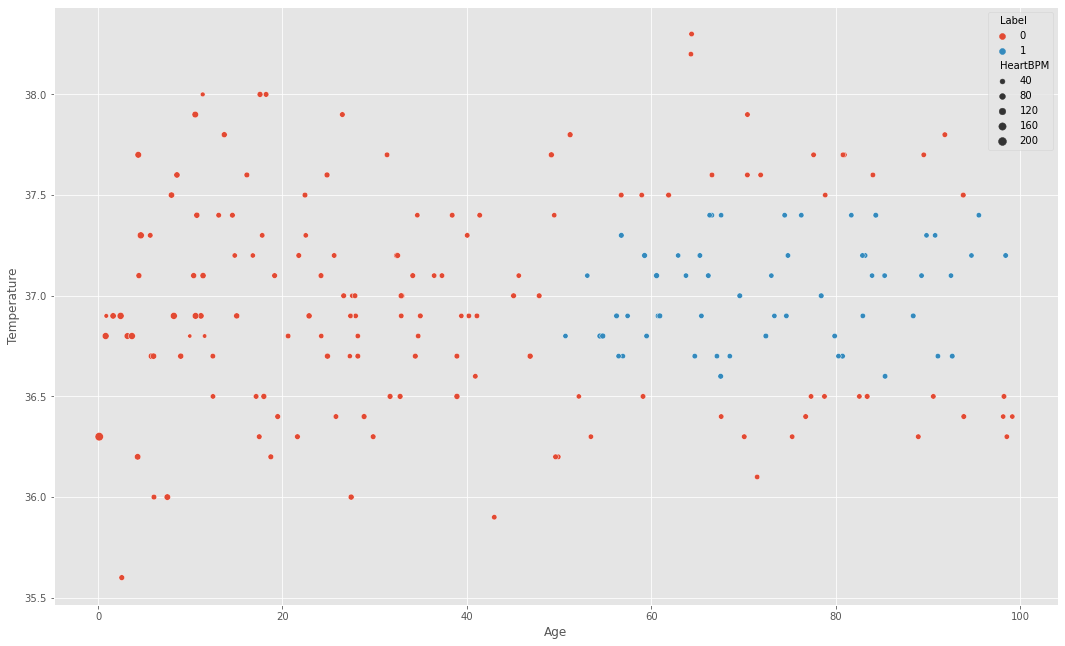

In [104]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,11)
sns.scatterplot(y = Data_Train.Temperature, x=Data_Train.Age,
               size = Data_Train.HeartBPM, hue= Data_Train.Label,
               )

<AxesSubplot:xlabel='Age', ylabel='HeartBPM'>

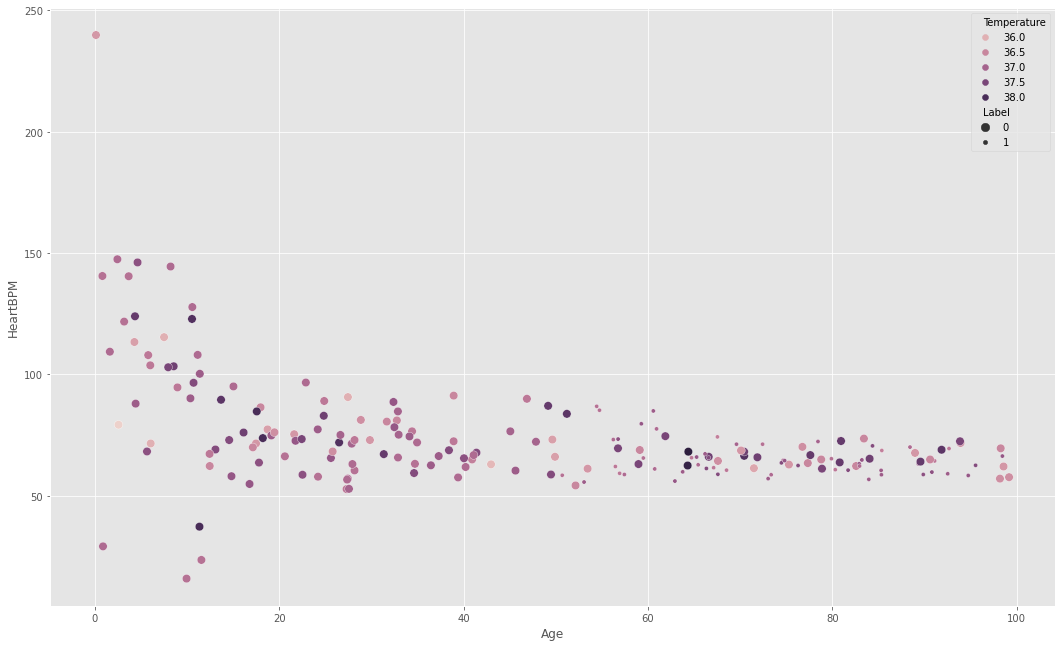

In [105]:
#Data_Train.plot(kind='scatter',x='Temperature',y='Age', color ='red', size = 'HeartBPM')
sns.scatterplot(x = Data_Train.Age, y=Data_Train.HeartBPM,
               size = Data_Train.Label, hue = Data_Train.Temperature)

In [106]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    float64
 1   Temperature  200 non-null    float64
 2   HeartBPM     200 non-null    float64
 3   Label        200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [107]:
Data_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          100 non-null    float64
 1   Temperature  100 non-null    float64
 2   HeartBPM     100 non-null    float64
 3   Label        100 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


In [108]:
Data_Train.head(10)

,Age,Temperature,HeartBPM,Label
0,93.904084,36.4,71.7,0
1,56.748386,37.5,69.5,0
2,11.386958,37.1,100.2,0
3,85.368439,36.6,68.6,1
4,56.927382,36.7,59.2,1
5,60.733076,36.9,61.0,1
6,76.280668,37.4,62.4,1
7,89.322576,37.1,63.1,1
8,40.222310,36.9,61.8,0
9,78.792286,36.5,64.9,0


In [109]:
Data_Test.head(10)

,Age,Temperature,HeartBPM,Label
0,16.344251,37.2,89.0,0
1,59.065050,37.2,72.6,1
2,3.184031,37.0,124.2,0
3,27.327332,37.5,51.7,0
4,19.655135,36.8,81.1,0
5,43.344648,37.0,72.3,0
6,90.937470,36.8,61.2,1
7,62.360387,37.3,85.3,1
8,94.654719,37.2,70.8,1
9,97.506078,37.5,60.3,0


In [110]:
# train_dataset = np.loadtxt(open("Data.csv", "rb"), delimiter=",", skiprows=1)

In [111]:
Data_Train.describe()

,Age,Temperature,HeartBPM,Label
count,200.000000,200.000000,200.000000,200.000000
mean,47.144303,36.981000,73.613000,0.285000
std,29.179433,0.477366,22.654431,0.452547
min,0.124864,35.600000,15.800000,0.000000
25%,21.732455,36.700000,62.200000,0.000000
50%,46.249900,36.900000,68.100000,0.000000
75%,72.583344,37.300000,76.500000,1.000000
max,99.170006,38.300000,239.800000,1.000000


In [112]:
Data_Test.describe()

,Age,Temperature,HeartBPM,Label
count,100.000000,100.000000,100.000000,100.000000
mean,48.052247,37.024000,75.389000,0.300000
std,29.177051,0.513872,24.826041,0.460566
min,0.276724,35.500000,43.500000,0.000000
25%,22.419044,36.800000,63.500000,0.000000
50%,50.213226,37.000000,67.800000,0.000000
75%,70.920791,37.300000,76.675000,1.000000
max,97.506078,38.000000,184.500000,1.000000


In [113]:
sum(Data_Test.duplicated())
sum(Data_Train.duplicated())

0

## This dataset contains no : missing data, qualitative values, normalized values


# Data Pre-Processing

In [114]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0

# percentage of training set to use as validation
valid_size = 0.2


In [115]:

# obtain training indices that will be used for validation
num_train = len(Data_Train)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]


In [116]:
Data_Train

,Age,Temperature,HeartBPM,Label
0,93.904084,36.4,71.7,0
1,56.748386,37.5,69.5,0
2,11.386958,37.1,100.2,0
3,85.368439,36.6,68.6,1
4,56.927382,36.7,59.2,1
...,...,...,...,...
195,32.876244,37.0,84.7,0
196,82.953197,36.9,62.2,1
197,92.515981,37.1,59.0,1
198,27.368299,36.9,56.6,0


In [117]:
# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

targets_df = pd.DataFrame(data=Data_Train["Label"])
targets_df.columns = ["Label"]


del Data_Train["Label"]

train = torch.utils.data.TensorDataset(torch.Tensor(np.array(Data_Train)), torch.tensor(targets_df['Label'].values))

train_loader = torch.utils.data.DataLoader(train,sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train,sampler=valid_sampler, num_workers=num_workers)

test_targets_df = pd.DataFrame(data=Data_Test["Label"])
test_targets_df.columns = ["Label"]

del Data_Test["Label"]

test = torch.utils.data.TensorDataset(torch.Tensor(np.array(Data_Test)), torch.tensor(test_targets_df['Label'].values))

test_loader = torch.utils.data.DataLoader(test,num_workers=num_workers)

In [118]:
train_loader

In [119]:
test_loader

# Building Classic Model

In [120]:
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch import nn
class Network(nn.Module):

    def __init__(self):
        super().__init__()

        # Inputs to hidden layer linear transformation
        #self.drop1 = nn.Dropout(p=0.8)
        self.input = nn.Linear(3, 5)
        #self.drop2 = nn.Dropout(p=0.5)
        self.hidden1 = nn.Linear(5, 5)
        self.hidden2 = nn.Linear(5, 4)
#         self.hidden3 = nn.Linear(5, 5)
#         self.hidden4 = nn.Linear(5, 5)
        self.hidden5 = nn.Linear(4, 2)
        
        self.output = nn.Linear(2, 2)
        # Define sigmoid activation and softmax output
        self.ReLU = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass the input tensor through each of our operations
        #x = self.drop1(x)
        x = self.input(x)
        #x = self.drop2(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
#         x = self.hidden3(x)
#         x = self.hidden4(x)
        x = self.hidden5(x)

        x = self.ReLU(x)
        x = self.output(x)
        
        x = self.softmax(x)

        return x

model = Network()


In [121]:
model1 = model
model2 = model
modelFed = model

models = [model1,model2]

# Training Model

Loss function is categorical cross-entropy
Optimisation is done by ADAM

In [122]:
# specify loss function (categorical cross-entropy for classification, L1 loss for mean absolute error)

criterion = nn.CrossEntropyLoss()
#criterion = nn.L1Loss()
#criterion = nn.NLLLoss()
#c


# specify optimizer (stochastic gradient descent)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# optimizer = torch.optim.NAdam(model.parameters(), lr=0.2, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, momentum_decay=0.004)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True)


In [123]:
import matplotlib.pyplot as plt

val_losses = []
train_losses = []

## https://www.kaggle.com/shubhendumishra/titanic-mlp-model-using-pytorch#Data-Exploration

In [124]:
#output = model(something)
#print(output[0]) prints specific output from model

In [125]:
#print(target[0]) prints labels

In [126]:
# number of epochs to train the model
n_epochs = 100

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # Train the model #
    ###################
    model.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        output = model(data[:,0:3])#.type(torch.FloatTensor)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    #################
    # Training Loss #
    #################
    #train_losses.append(loss.item())
    train_losses.append(train_loss/len(train_loader.sampler))
        
    ######################    
    # Validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data[:,0:3])
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
    #############
    #Tensorboard#
    #############
        #val_losses.append(loss.item())
    val_losses.append(valid_loss/len(valid_loader.sampler))
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        #torch.load('model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.624437 	Validation Loss: 0.624266
Validation loss decreased (inf --> 0.624266).  Saving model ...
Epoch: 2 	Training Loss: 0.611371 	Validation Loss: 0.618064
Validation loss decreased (0.624266 --> 0.618064).  Saving model ...
Epoch: 3 	Training Loss: 0.604895 	Validation Loss: 0.615051
Validation loss decreased (0.618064 --> 0.615051).  Saving model ...
Epoch: 4 	Training Loss: 0.601782 	Validation Loss: 0.613296
Validation loss decreased (0.615051 --> 0.613296).  Saving model ...
Epoch: 5 	Training Loss: 0.599739 	Validation Loss: 0.612451
Validation loss decreased (0.613296 --> 0.612451).  Saving model ...
Epoch: 6 	Training Loss: 0.598359 	Validation Loss: 0.611794
Validation loss decreased (0.612451 --> 0.611794).  Saving model ...
Epoch: 7 	Training Loss: 0.597293 	Validation Loss: 0.611411
Validation loss decreased (0.611794 --> 0.611411).  Saving model ...
Epoch: 8 	Training Loss: 0.597098 	Validation Loss: 0.611245
Validation loss decreased (0.61141

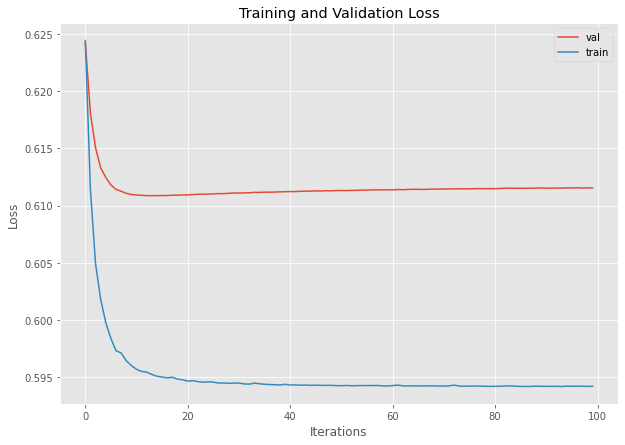

In [127]:
plt.figure(figsize=(10,7))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [128]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [129]:
Data_Test.head()

,Age,Temperature,HeartBPM
0,16.344251,37.2,89.0
1,59.065050,37.2,72.6
2,3.184031,37.0,124.2
3,27.327332,37.5,51.7
4,19.655135,36.8,81.1


In [130]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation
results=[]
for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data[:,:])
    #print(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    results.append([int(data[:,0].item()), pred.item()])
    # compare predictions to true label
    correct = pred.eq(target.view_as(pred))
  
    # calculate test accuracy for each object class
    #break
    #print('Output %s Target %s Predicted %s Correct %s' % (output,target.item(),pred.item(),correct.item()))
    for i in range(len(target)):
        label = target.data
        class_correct[label] += correct.item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.610864

Test Accuracy of     0: 100% (70/70)
Test Accuracy of     1:  0% ( 0/30)

Test Accuracy (Overall): 70% (70/100)


## Federated Learning 

In [158]:

#!/usr/bin/env python
# -*- coding: utf-8 -*-
# Python version: 3.6

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import pdb


class DatasetSplit(Dataset):
    """An abstract Dataset class wrapped around Pytorch Dataset class.
    """

    def __init__(self, dataset, idxs):
        self.dataset = dataset
        self.idxs = [int(i) for i in idxs]

    def __len__(self):
        return len(self.idxs)

    def __getitem__(self, item):
        data, target = self.dataset[self.idxs[item]]
        return torch.tensor(data), torch.tensor(target)

class LocalUpdate(object):
    def __init__(self, dataset, idxs):
        self.trainloader, self.validloader, self.testloader = self.train_val_test(
            dataset, list(idxs))
        self.device = 'cpu'
        #if args.gpu else 'cuda'
        # Default criterion set to NLL loss function
        self.criterion = nn.NLLLoss().to(self.device)

    def train_val_test(self, dataset, idxs):
        """
        Returns train, validation and test dataloaders for a given dataset
        and user indexes.
        """
        # split indexes for train, validation, and test (80, 10, 10)
        idxs_train = idxs[:int(0.8*len(idxs))]
        idxs_val = idxs[int(0.8*len(idxs)):int(0.9*len(idxs))]
        idxs_test = idxs[int(0.9*len(idxs)):]

        trainloader = DataLoader(DatasetSplit(dataset, idxs_train),
                                 batch_size= 240, shuffle=True)
        validloader = DataLoader(DatasetSplit(dataset, idxs_val),
                                 batch_size= 30, shuffle=False)
        testloader = DataLoader(DatasetSplit(dataset, idxs_test),
                                batch_size= 30, shuffle=False)
        print('This is our total dataset size', len(idxs),'this is tied to when we set idxs')
        return trainloader, validloader, testloader

    def update_weights(self, model, global_round):
        # Set mode to train model
        model.train()
        epoch_loss = []

        # Set optimizer for the local updates
        #num_train = len(Data_Train)
        #indices = list(range(num_train))
        #np.random.shuffle(indices)
        #split = int(np.floor(valid_size * num_train))
        #train_idx, valid_idx = indices[split:], indices[:split]
        optimizer = torch.optim.Adam(model.parameters(), lr=0.005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True)
        #trainloader = self.trainloader
        #trainloader = torch.utils.data.DataLoader(torch.Tensor(np.array(Data_Total)),sampler=train_sampler, num_workers=num_workers)
        #trainloader = DataLoader(DatasetSplit(train, train_idx),
        
         #batch_size=99, shuffle=True)
        
        for iter in range(3):
            batch_loss = []
            a=0
            print('trainloader: {}'.format((self.trainloader)))
            pdb.set_trace()
            for batch_idx, (data, target) in enumerate(self.trainloader):
                data, target = data.to(self.device), target.to(self.device)

                #optimizer.zero_grad()
                model.zero_grad()
                log_probs = model(data)
                loss = self.criterion(log_probs, target)
                loss.backward()
                optimizer.step()
                
                print('len of data :{}'.format(len(data)))
                if (batch_idx % 10 == 0):
                     print('| Global Round : {} | Local Epoch : {} | [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                             global_round, iter, batch_idx * len(data),
                             len(self.trainloader.dataset),
                             100. * batch_idx / len(self.trainloader.dataset), loss.item()))
                
               
                a=a+1
                print('hy',type(self.trainloader.dataset))
               
               
                
                batch_loss.append(loss.item())
            epoch_loss.append(sum(batch_loss)/len(batch_loss))

        return model.state_dict(), sum(epoch_loss) / len(epoch_loss)

def createList(n):
    lst = []
    for i in range(n+1):
        lst.append(i)
    return(lst)




In [ ]:

import copy
# number of epochs to train the model
n_epochs = 10

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # Train the model #
    ###################
    modelFed.train() # prep model for training
    local_weights, local_losses = [], []
    idxs_users = np.random.choice(range(4), 2, replace=False)
    idxs=  createList(300) #======================================================>
    for idx in idxs_users:
        local_model = LocalUpdate(dataset=Data_Total, idxs=idxs) #,
        #idxs=user_groups[idx])
        
        #############
        w, loss = local_model.update_weights(
                
                
        model=copy.deepcopy(modelFed), global_round=epoch)
        local_weights.append(copy.deepcopy(w))
        local_losses.append(copy.deepcopy(loss))
    print('length of self.trainloader',len(self.trainloader))        
    for data, target in self.trainloader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        output = model(data[:,:])#.type(torch.FloatTensor)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    #################
    # Training Loss #
    #################
    #train_losses.append(loss.item())
    train_losses.append(train_loss/len(self.trainloader.sampler))
        
    ######################    
    # Validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data[:,:])
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
    #############
    #Tensorboard#
    #############
        #val_losses.append(loss.item())
    val_losses.append(valid_loss/len(valid_loader.sampler))
   
    
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        #torch.load('model.pt')
        valid_loss_min = valid_loss

This is our total dataset size 301 this is tied to when we set idxs
trainloader: <torch.utils.data.dataloader.DataLoader object at 0x7fae4ef8f880>
> /tmp/ipykernel_23829/3405453912.py(77)update_weights()
     75             print('trainloader: {}'.format((self.trainloader)))
     76             pdb.set_trace()
---> 77             for batch_idx, (data, target) in enumerate(self.trainloader):
     78                 data, target = data.to(self.device), target.to(self.device)
     79 

